<a href="https://colab.research.google.com/github/RomainBui/I3M/blob/main/I3M_COLAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I3M Computation by 3R






*   **Image muste be : "I3M.jpg"**




## Select Model + Image

In [ ]:
from google.colab import files

print('please select your Image')
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

please select your Image


Saving I3M.jpg to I3M.jpg
User uploaded file "I3M.jpg" with length 7218 bytes


In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
downloaded = drive.CreateFile({'id':"1CAn1PBg_OrGhN41LP51UNY46zTsi3xo-"})   # replace the id with id of file you want to access
downloaded.GetContentFile('I3M.h5')  

## Install Matterport Mask-RCNN in Google Colab





In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
!pip3 uninstall -y keras
!pip3 install keras==2.2.5

Uninstalling Keras-2.3.1:
  Successfully uninstalled Keras-2.3.1
     |████████████████████████████████| 337kB 4.4MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [ ]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN
!pip3 install -r requirements.txt
!python3 setup.py install

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 26.03 MiB/s, done.
Resolving deltas: 100% (562/562), done.
/content/Mask_RCNN
     |████████████████████████████████| 204kB 3.9MB/s 
     |████████████████████████████████| 163kB 5.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=73bcdc19cf92e8f0f9c2186d17d0ea9d5b17cb00cc55069bf5d54601d514c353
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:645: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_o

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

Cloning into 'cocoapi'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (576/576), done.
/content/Mask_RCNN/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
cythoning pycocotools/_mask.pyx to pycocotools/_mask.c
/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/Mask_RCNN/cocoapi/PythonAPI/pycocotools/_mask.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-a56wZI/python3.7-3.

## Import and Config

In [ ]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json

# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

Using TensorFlow backend.


In [ ]:
## UPDATE WT
class RadioConfig(Config):
    # Give the configuration a recognizable name
    NAME = "tooth_segmentation"
    
    NUM_CLASSES = 1 + 1 #NB : 2 because MT and JAD

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    
    STEPS_PER_EPOCH = 250

    # New
    IMAGE_MAX_DIM = 256
    IMAGE_MIN_DIM = 256

config = RadioConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  256
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  256
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [256 256   3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE             

## Inference production

In [ ]:
%cd ..

/content


In [ ]:
MODEL_DIR = ""
class InferenceConfig(RadioConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = "I3M.h5"
#model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.
Loading weights from  I3M.h5








In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

def _arr_todraw_skeleton(skeleton, width, height):
    points = []
    for y in range(height):
        for x in range(width):
            if skeleton[y][x]:
                points.append(x)
                points.append(y)
    return points

In [ ]:
import numpy as np
from skimage.morphology import skeletonize
from PIL import Image, ImageDraw


path_image = "I3M.jpg"
img_to_pred = Image.open(path_image).convert('RGB')
img_to_pred_arr = np.array(Image.open(path_image).convert('RGB'))

In [ ]:
cnames = ['BG', 'MT']

results = model.detect([img_to_pred_arr], verbose=1)

r = results[0]

Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 256, 256, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  256.00000  int64
anchors                  shape: (1, 16368, 4)         min:   -1.41976  max:    2.16878  float32


In [ ]:
mask = r['masks']

mask_unique = np.array([[0]*mask.shape[1]]*mask.shape[0])
for x in range(mask.shape[0]): 
    for y in range(mask.shape[1]):
        mask_unique[x][y] = mask[x][y][0] or mask[x][y][1] 

        
mask_unique_draw = _arr_todraw_skeleton(mask_unique, mask_unique.shape[1], mask_unique.shape[0]) 

skeleton_arr = skeletonize(np.where(mask_unique>0,1,0))
skeleton_draw = _arr_todraw_skeleton(skeleton_arr, skeleton_arr.shape[1], skeleton_arr.shape[0])

In [ ]:
def _find_endpoints(image_array, width, height):
    points = []
    for y in range(height):
        for x in range(width):
            if not image_array[y][x]:
                continue
            neighbours_count = _neighbours_count(image_array, x, y, width, height)

            # endpoint
            if neighbours_count == 1:
                points.append((x, y))
    return points

def _neighbours_count(image_buffer, x, y, width, height):
    points = []
    for py in range(y-1,y+2):
        for px in range(x-1,x+2):
            if y == py and x == px:
                continue
            if py > -1 and py < height and px > -1 and px < width:
                points.append((px, py))
    return len([p for p in points if image_buffer[p[1]][p[0]]])

def _add_mark(image, position, color, size=5):
    ImageDraw.Draw(image).ellipse((position[0] - size // 2, position[1] - size // 2, position[0] + size // 2, position[1] + size // 2), fill=color)

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

def get_concat_v(im1, im2):
    dst = Image.new('RGB', (im1.width, im1.height + im2.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst

In [ ]:
endpoints_arr = _find_endpoints(skeleton_arr, skeleton_arr.shape[1], skeleton_arr.shape[0])

In [ ]:
width = skeleton_arr.shape[1]
height = skeleton_arr.shape[0]

viz = Image.new('RGB', (width,height)).convert('RGB')
draw = ImageDraw.Draw(viz)

# Draw infered mask
draw.point(mask_unique_draw, fill="Green")

# Update viz by blending
viz = Image.blend(img_to_pred, viz, alpha=0.15)

# Draw skeleton
draw = ImageDraw.Draw(viz)
draw.point(skeleton_draw, fill='Blue')

# Draw endpoints
for ep in endpoints_arr: 
    _add_mark(viz, ep, "Red")

draw.text([0,0], 'Mask_RCNN Fit Score - {:.4f}'.format(sum(r['scores'])/len(r['scores'])))

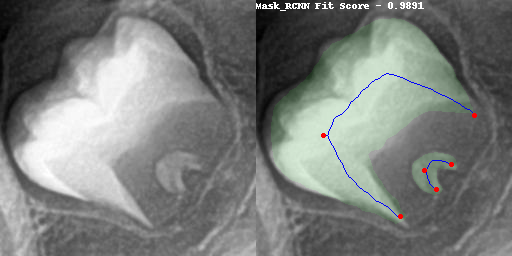

In [ ]:
get_concat_h(img_to_pred, viz)

In [ ]:
get_concat_h(img_to_pred, viz).save("results.jpg")

## Download final file

In [ ]:
files.download('results.jpg')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>